In [88]:
import numpy as np
import pandas as pd

In [89]:
df = pd.read_csv('HouseDetails.csv')

In [90]:
df

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir,V17
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No,
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot,water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot,water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot,air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot,air,gas,public/commercial,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot,water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot,water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot,air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot,air,gas,public/commercial,No,No,No


In [91]:
df.columns.values

array(['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege',
       'bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'heating', 'fuel',
       'sewer', 'waterfront', 'newConstruction', 'centralAir', 'V17'],
      dtype=object)

In [92]:
df.isna().sum(axis=0)

price              0
lotSize            0
age                0
landValue          0
livingArea         0
pctCollege         0
bedrooms           0
fireplaces         0
bathrooms          0
rooms              0
heating            0
fuel               0
sewer              0
waterfront         0
newConstruction    0
centralAir         0
V17                0
dtype: int64

* Ther are no Nan values or missing values

In [93]:
df.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


<AxesSubplot:ylabel='price'>

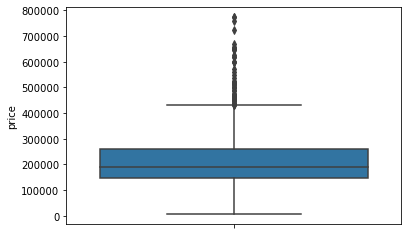

In [94]:
import seaborn as sns
sns.boxplot(y=df['price'])

In [95]:
q1 = np.percentile(df['price'], 25)

In [96]:
q1

145000.0

In [97]:
q3 =np.percentile(df['price'], 75)

In [98]:
iqr = q3-q1

In [99]:
df[df['price'] > (1.5*iqr + q3)]['price'].index

Int64Index([  28,  233,  313,  434,  477,  548,  553,  570,  578,  590,  591,
             601,  611,  625,  628,  638,  665,  684,  686,  701,  710,  715,
             725,  729,  843,  940,  961,  981,  986, 1059, 1169, 1194, 1201,
            1206, 1216, 1224, 1238, 1245, 1253, 1274, 1278, 1285, 1305, 1325,
            1329, 1347, 1419, 1491, 1540, 1549, 1569, 1621, 1720],
           dtype='int64')

In [100]:
outliers_test_data = df.iloc[df[df['price'] > (1.5*iqr + q3)]['price'].index]

In [101]:
temp = pd.DataFrame(df.iloc[1010]).transpose()

In [102]:
temp

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir,V17
1010,5000,0.29,4,35800,1700,63,3,1,2.5,6,hot,air,gas,public/commercial,No,No,Yes


In [103]:
outliers_test_data = pd.concat([outliers_test_data, temp], axis = 0)

In [104]:
outliers_test_data

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir,V17
28,457000,0.43,53,2700,2461,39,4,1,2.0,10,hot,air,oil,public/commercial,Yes,No,No
233,490000,0.34,18,79700,1346,52,3,1,2.0,6,hot,air,oil,public/commercial,Yes,No,No
313,625000,0.45,14,119500,5228,64,4,4,4.0,12,hot,air,gas,public/commercial,No,No,Yes
434,435000,1.0,25,25000,4211,57,5,2,3.5,12,hot,water/steam,gas,septic,No,No,No
477,520000,0.41,13,3100,2702,47,3,1,2.5,11,hot,air,oil,public/commercial,No,No,No
548,512971,0.01,0,12500,1904,57,2,1,2.0,8,hot,air,gas,public/commercial,No,No,Yes
553,559000,0.24,55,255000,3090,57,4,2,4.0,12,hot,water/steam,gas,public/commercial,No,No,Yes
570,760000,1.22,2,194700,3148,57,5,0,3.5,12,hot,air,gas,septic,No,No,Yes
578,496000,0.34,3,82400,3467,57,4,1,2.5,11,hot,air,gas,public/commercial,No,No,Yes
590,620000,1.06,14,125100,4856,57,5,2,4.0,12,hot,air,oil,septic,No,No,Yes


In [105]:
outliers_test_data.sort_index(inplace=True)

In [106]:
outliers_test_data

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir,V17
28,457000,0.43,53,2700,2461,39,4,1,2.0,10,hot,air,oil,public/commercial,Yes,No,No
233,490000,0.34,18,79700,1346,52,3,1,2.0,6,hot,air,oil,public/commercial,Yes,No,No
313,625000,0.45,14,119500,5228,64,4,4,4.0,12,hot,air,gas,public/commercial,No,No,Yes
434,435000,1.0,25,25000,4211,57,5,2,3.5,12,hot,water/steam,gas,septic,No,No,No
477,520000,0.41,13,3100,2702,47,3,1,2.5,11,hot,air,oil,public/commercial,No,No,No
548,512971,0.01,0,12500,1904,57,2,1,2.0,8,hot,air,gas,public/commercial,No,No,Yes
553,559000,0.24,55,255000,3090,57,4,2,4.0,12,hot,water/steam,gas,public/commercial,No,No,Yes
570,760000,1.22,2,194700,3148,57,5,0,3.5,12,hot,air,gas,septic,No,No,Yes
578,496000,0.34,3,82400,3467,57,4,1,2.5,11,hot,air,gas,public/commercial,No,No,Yes
590,620000,1.06,14,125100,4856,57,5,2,4.0,12,hot,air,oil,septic,No,No,Yes


In [107]:
df.drop(index=df[df['price'] > (1.5*iqr + q3)]['price'].index, inplace= True)

In [108]:
 df.drop(index=[1010], inplace= True)

In [109]:
df

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir,V17
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No,
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot,water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot,water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot,air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot,air,gas,public/commercial,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot,water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot,water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot,air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot,air,gas,public/commercial,No,No,No


* Treated outliers of Price column and stored outliers rows in outliers_test_data for suture uuse

In [110]:
df.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,201766.675030,0.489134,28.164875,32489.737157,1719.882915,55.440263,3.141577,0.586022,1.873656,6.944444
std,78784.002354,0.639276,29.081974,30533.591343,578.167000,10.440923,0.815073,0.539040,0.639658,2.257991
min,10300.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,144275.000000,0.170000,13.000000,15100.000000,1294.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,186750.000000,0.370000,19.000000,24800.000000,1612.000000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,249900.000000,0.540000,34.000000,38300.000000,2098.750000,64.000000,4.000000,1.000000,2.500000,8.000000
max,430000.000000,8.970000,225.000000,250000.000000,4534.000000,82.000000,7.000000,3.000000,4.500000,12.000000


In [111]:
df[df['lotSize'] == 0.00]

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir,V17
15,89900,0.0,88,2500,936,57,3,0,1.0,4,hot,water/steam,gas,public/commercial,No,No,No


In [3]:
numeric_data = df._get_numeric_data()

NameError: name 'df' is not defined

In [2]:
import matplotlib.pyplot as plt

In [5]:
corr_matrix = numeric_data.corr()
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of rain aus Dataset')
sns.heatmap(corr_matrix, annot=True, square=True, linecolor='black')
plt.show()

NameError: name 'numeric_data' is not defined

In [115]:
p = pd.DataFrame(np.triu(corr_matrix,k = 1))
p

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.161218,-0.211782,0.526911,0.713088,0.206368,0.442615,0.365821,0.611381,0.511474
1,0.0,0.000000,-0.011280,0.031563,0.162621,-0.049828,0.124403,0.088984,0.078717,0.126144
2,0.0,0.000000,0.000000,-0.005683,-0.163487,-0.033411,0.038277,-0.176529,-0.359878,-0.063778
3,0.0,0.000000,0.000000,0.000000,0.383318,0.241993,0.206696,0.188537,0.264694,0.257537
4,0.0,0.000000,0.000000,0.000000,0.000000,0.205268,0.671658,0.439777,0.703029,0.716006
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.158221,0.248424,0.171043,0.146898
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.276328,0.449922,0.673642
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.411620,0.291462
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.488023
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [116]:
high_corr_col = [col for col in p.columns if any(p[col] > 0.9) ]
high_neg_corr_col = [col for col in p.columns if any(p[col] < -0.9) ]


In [117]:
high_corr_col

[]

In [118]:
high_neg_corr_col

[]

* There are no highly correlated input parameters in the dataset

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'lotSize'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'landValue'}>,
        <AxesSubplot:title={'center':'livingArea'}>,
        <AxesSubplot:title={'center':'pctCollege'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'fireplaces'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'rooms'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

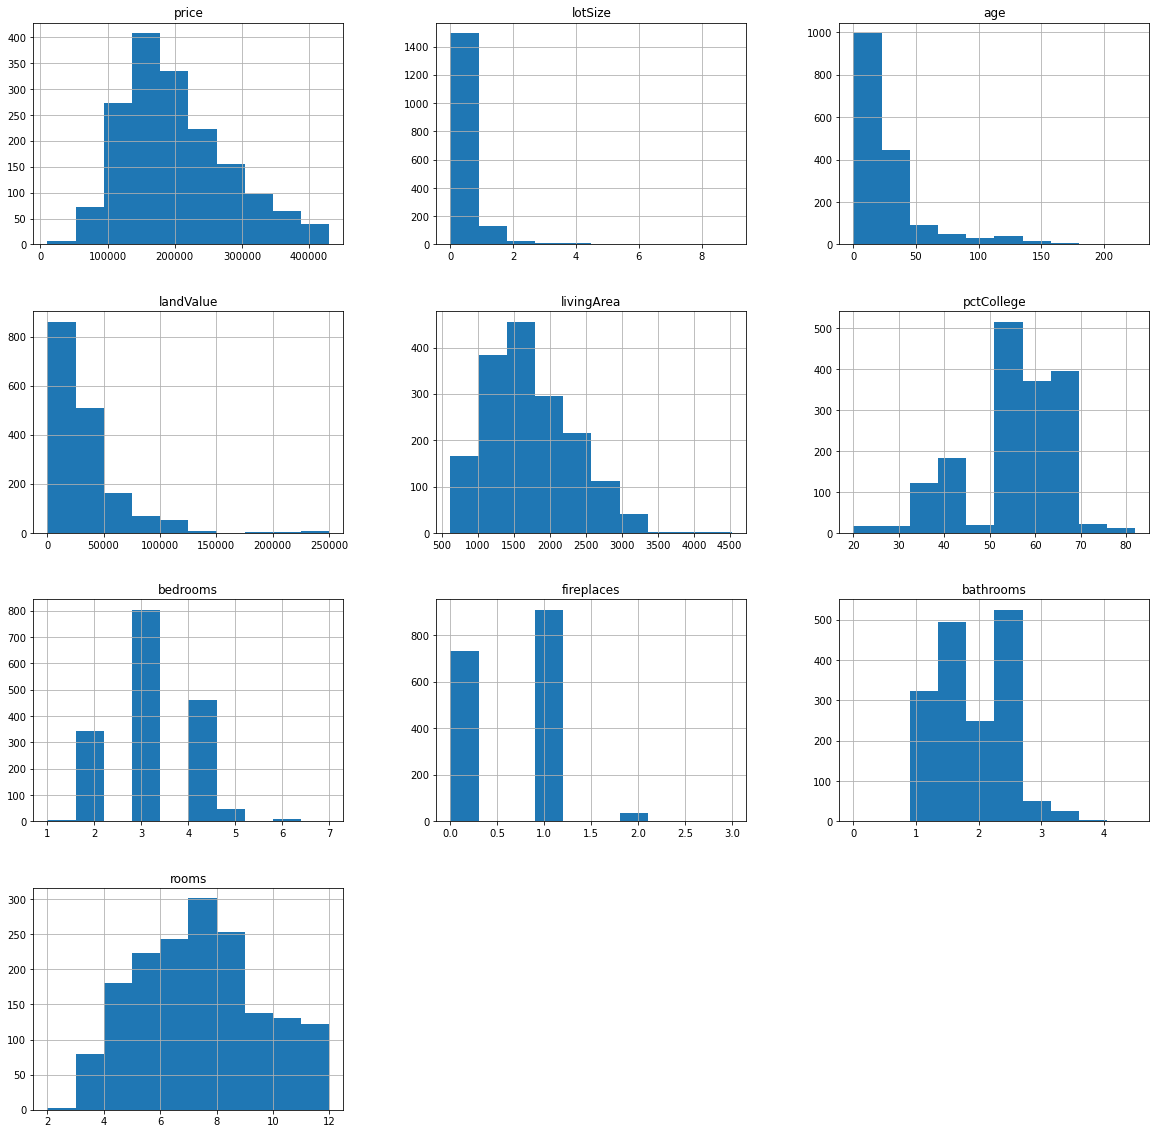

In [119]:
numeric_data.hist(figsize=(20,20))

In [120]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
num = scale.fit_transform(numeric_data)

In [121]:
new_num = pd.DataFrame(num, columns=numeric_data.columns.values)

In [122]:
new_num.drop(labels=['price'], inplace=True, axis = 1)
new_num

,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
0,-0.624540,0.475871,0.573647,-1.408116,-1.958292,-1.401002,0.768222,-1.366226,-0.861396
1,0.674193,-0.968754,-0.333822,0.403321,-0.425402,-0.173751,-1.087484,0.979479,-0.418392
2,-0.468066,3.605892,-0.825231,0.387750,-0.425402,1.053501,0.768222,-1.366226,0.467615
3,-0.123824,-0.521609,-0.451760,0.387750,-0.425402,-0.173751,0.768222,-0.584324,-0.861396
4,-0.593245,-0.968754,-0.572974,-1.522304,-0.425402,-1.401002,-1.087484,-1.366226,-1.747404
...,...,...,...,...,...,...,...,...,...
1669,-0.170766,0.131912,-0.271577,1.020974,0.532654,2.280752,0.768222,0.979479,1.796627
1670,0.705487,0.303892,0.121550,1.460425,0.532654,1.053501,0.768222,0.979479,1.796627
1671,-0.155118,-0.659192,-0.396067,-1.074203,-0.425402,-1.401002,-1.087484,-1.366226,-1.747404
1672,-0.389829,0.682246,-0.514005,-0.856207,-0.425402,-0.173751,0.768222,-1.366226,0.024611


In [123]:
pric = df[['price']]

In [124]:
pric = pric.reset_index()

In [125]:
pric.drop(labels=['index'], axis = 1, inplace=True)

In [126]:
pric

,price
0,132500
1,181115
2,109000
3,155000
4,86060
...,...
1669,289000
1670,285000
1671,194900
1672,125000


In [127]:
numeric_data = pd.concat([pric, new_num], axis = 1)

In [128]:
numeric_data

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
0,132500,-0.624540,0.475871,0.573647,-1.408116,-1.958292,-1.401002,0.768222,-1.366226,-0.861396
1,181115,0.674193,-0.968754,-0.333822,0.403321,-0.425402,-0.173751,-1.087484,0.979479,-0.418392
2,109000,-0.468066,3.605892,-0.825231,0.387750,-0.425402,1.053501,0.768222,-1.366226,0.467615
3,155000,-0.123824,-0.521609,-0.451760,0.387750,-0.425402,-0.173751,0.768222,-0.584324,-0.861396
4,86060,-0.593245,-0.968754,-0.572974,-1.522304,-0.425402,-1.401002,-1.087484,-1.366226,-1.747404
...,...,...,...,...,...,...,...,...,...,...
1669,289000,-0.170766,0.131912,-0.271577,1.020974,0.532654,2.280752,0.768222,0.979479,1.796627
1670,285000,0.705487,0.303892,0.121550,1.460425,0.532654,1.053501,0.768222,0.979479,1.796627
1671,194900,-0.155118,-0.659192,-0.396067,-1.074203,-0.425402,-1.401002,-1.087484,-1.366226,-1.747404
1672,125000,-0.389829,0.682246,-0.514005,-0.856207,-0.425402,-0.173751,0.768222,-1.366226,0.024611


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1727
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1674 non-null   int64  
 1   lotSize          1674 non-null   float64
 2   age              1674 non-null   int64  
 3   landValue        1674 non-null   int64  
 4   livingArea       1674 non-null   int64  
 5   pctCollege       1674 non-null   int64  
 6   bedrooms         1674 non-null   int64  
 7   fireplaces       1674 non-null   int64  
 8   bathrooms        1674 non-null   float64
 9   rooms            1674 non-null   int64  
 10  heating          1674 non-null   object 
 11  fuel             1674 non-null   object 
 12  sewer            1674 non-null   object 
 13  waterfront       1674 non-null   object 
 14  newConstruction  1674 non-null   object 
 15  centralAir       1674 non-null   object 
 16  V17              1674 non-null   object 
dtypes: float64(2),

In [130]:
df['fuel'].value_counts()

air            1074
water/steam     297
electric        296
gas               6
oil               1
Name: fuel, dtype: int64

### Following is code for one way Anova test conducted for categorical independent variables

* One way - Anova test 'fuel'

In [131]:
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df.groupby('fuel')['price'].apply(list)

print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print(AnovaResults)
print('P-Value for Anova is: ', AnovaResults[1])

fuel
air            [155000, 86060, 120000, 170000, 122900, 325000...
electric       [132500, 90000, 85860, 112000, 104900, 90400, ...
gas             [102900, 155000, 190000, 144500, 148900, 255000]
oil                                                     [200000]
water/steam    [181115, 109000, 153000, 97000, 89900, 60000, ...
Name: price, dtype: object
F_onewayResult(statistic=28.66719392735686, pvalue=4.5256699430365283e-23)
P-Value for Anova is:  4.5256699430365283e-23


* One way - Anova test 'sewer'

In [132]:
CategoryGroupLists=df.groupby('sewer')['price'].apply(list)

CategoryGroupLists
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print(AnovaResults)
print('P-Value for Anova is: ', AnovaResults[1])

F_onewayResult(statistic=33.671952012522716, pvalue=7.602211126890069e-33)
P-Value for Anova is:  7.602211126890069e-33


* One way - Anova test 'water front'

In [133]:
CategoryGroupLists=df.groupby('waterfront')['price'].apply(list)

CategoryGroupLists
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print(AnovaResults)
print('P-Value for Anova is: ', AnovaResults[1])

F_onewayResult(statistic=44.12889231943886, pvalue=2.96537870028095e-35)
P-Value for Anova is:  2.96537870028095e-35


* One way - Anova test 'new construction' 

In [134]:
CategoryGroupLists=df.groupby('newConstruction')['price'].apply(list)

CategoryGroupLists
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print(AnovaResults)
print('P-Value for Anova is: ', AnovaResults[1])

F_onewayResult(statistic=4.607648440927238, pvalue=0.0319731534457341)
P-Value for Anova is:  0.0319731534457341


* One way - Anova test 'central air' 

In [135]:
CategoryGroupLists=df.groupby('centralAir')['price'].apply(list)

CategoryGroupLists
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print(AnovaResults)
print('P-Value for Anova is: ', AnovaResults[1])

F_onewayResult(statistic=28.493212699746675, pvalue=1.0690594100347796e-07)
P-Value for Anova is:  1.0690594100347796e-07


* One way - Anova test 'V17' 

In [136]:
CategoryGroupLists=df.groupby('V17')['price'].apply(list)

CategoryGroupLists
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print(AnovaResults)
print('P-Value for Anova is: ', AnovaResults[1])

F_onewayResult(statistic=140.31584320847895, pvalue=4.671015624375108e-57)
P-Value for Anova is:  4.671015624375108e-57


* One way - Anova test 'heating' 

In [137]:
CategoryGroupLists=df.groupby('heating')['price'].apply(list)

CategoryGroupLists
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print(AnovaResults)
print('P-Value for Anova is: ', AnovaResults[1])

F_onewayResult(statistic=110.95191954355599, pvalue=3.6494391813925777e-25)
P-Value for Anova is:  3.6494391813925777e-25


In [138]:
df['V17'].value_counts()

No     832
Yes    539
       303
Name: V17, dtype: int64

* Working with categorical variables

In [139]:
categorical_data = df.iloc[:, 10:]
categorical_data.shape

(1674, 7)

In [140]:
for i in categorical_data:
    print(categorical_data[i].unique())

['electric' 'hot']
['electric' 'water/steam' 'air' 'gas' 'oil']
['septic' 'gas' 'oil' 'public/commercial' 'electric' 'none']
['No' 'septic' 'public/commercial' 'none' 'Yes']
['No' 'Yes']
['No' 'Yes']
[' ' 'No' 'Yes']


* Creating dummy variables for all the categorical independent variables and removing one categories to avoid dummy traps.

* Concatinating the dataframe and dummy variables. Dropping original categorical variables from dataframe

In [141]:
cat = pd.get_dummies(categorical_data, drop_first=True).reset_index()

In [142]:
cat.drop(labels=['index'], inplace =True, axis = 1)

In [143]:
df_new = pd.concat([numeric_data,cat], axis = 1)

In [144]:
df_new

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,...,sewer_public/commercial,sewer_septic,waterfront_Yes,waterfront_none,waterfront_public/commercial,waterfront_septic,newConstruction_Yes,centralAir_Yes,V17_No,V17_Yes
0,132500,-0.624540,0.475871,0.573647,-1.408116,-1.958292,-1.401002,0.768222,-1.366226,-0.861396,...,0,1,0,0,0,0,0,0,0,0
1,181115,0.674193,-0.968754,-0.333822,0.403321,-0.425402,-0.173751,-1.087484,0.979479,-0.418392,...,0,0,0,0,0,1,0,0,1,0
2,109000,-0.468066,3.605892,-0.825231,0.387750,-0.425402,1.053501,0.768222,-1.366226,0.467615,...,0,0,0,0,1,0,0,0,1,0
3,155000,-0.123824,-0.521609,-0.451760,0.387750,-0.425402,-0.173751,0.768222,-0.584324,-0.861396,...,0,0,0,0,0,1,0,0,1,0
4,86060,-0.593245,-0.968754,-0.572974,-1.522304,-0.425402,-1.401002,-1.087484,-1.366226,-1.747404,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,289000,-0.170766,0.131912,-0.271577,1.020974,0.532654,2.280752,0.768222,0.979479,1.796627,...,0,0,0,0,1,0,0,0,1,0
1670,285000,0.705487,0.303892,0.121550,1.460425,0.532654,1.053501,0.768222,0.979479,1.796627,...,0,0,0,0,1,0,0,0,1,0
1671,194900,-0.155118,-0.659192,-0.396067,-1.074203,-0.425402,-1.401002,-1.087484,-1.366226,-1.747404,...,0,0,0,0,1,0,0,0,1,0
1672,125000,-0.389829,0.682246,-0.514005,-0.856207,-0.425402,-0.173751,0.768222,-1.366226,0.024611,...,0,0,0,0,1,0,0,0,1,0


In [145]:
df_new.shape

(1674, 28)

* Creating separating target variables and independent variables 

In [146]:
target = df_new.iloc[:, 0]

In [147]:
independent_var = df_new.iloc[:,1:]

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_Train, X_test, y_train, y_test = train_test_split(independent_var, target, test_size = 0.2)

In [150]:
X_Train.shape, X_test.shape

((1339, 27), (335, 27))

* Building linear regression using sklearn library. We are using this library to find intercept alone because for OLS of statsmodel.api doesnt find intercept. We have to find it separately.<p style = 'color:red' style = 'fontsize:30px'>I am also not sure how to find intercept using statsmodel. there must be function in it. For now I have calculated Intercept using sklearn</p>

In [151]:
import sklearn.linear_model as lm

In [152]:
lin = lm.LinearRegression()

In [153]:
model = lin.fit(X_Train, y_train)

In [154]:
constant = model.intercept_

* Building linear model and finding summary if model

In [155]:
import statsmodels.api as sm

In [156]:
X_constant = sm.add_constant(constant)
lin_reg = sm.OLS(y_train,X_Train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     108.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.61e-283
Time:                        17:31:58   Log-Likelihood:                -16286.
No. Observations:                1339   AIC:                         3.262e+04
Df Residuals:                    1315   BIC:                         3.274e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
lotSize                       4331.2817   1630.902      2.656      0.008    1131.829    7530.735
age                          -5791.8911   1547.030     -3.744      0.000   -8826.808   -2756.974
landValue                     2.376e+04   1483.485     16.018      0.000    2.09e+04    2.67e+04
livingArea                    3.358e+04   2589.656     12.968      0.000    2.85e+04    3.87e+04
pctCollege                     763.3147   1410.372      0.541      0.588   -2003.511    3530.140
bedrooms                     -1532.0934   1923.417     -0.797      0.426   -5305.395    2241.208
fireplaces                    1133.7657   1503.454      0.754      0.451   -1815.664    4083.196
bathrooms                     1.242e+04   2010.600      6.178      0.000    8477.873    1.64e+04
rooms                         3985.2110   1975.479      2.017      0.044     109.777    7860.645
heating_hot                   1.039e+05   7922.491     13.112      0.000    8.83e+04    1.19e+05
fuel_electric                  8.79e+04    1.2e+04      7.305      0.000    6.43e+04    1.12e+05
fuel_gas                      9.212e+04   2.25e+04      4.093      0.000     4.8e+04    1.36e+05
fuel_oil                      1.202e+05   4.05e+04      2.968      0.003    4.08e+04       2e+05
fuel_water/steam             -1872.7902   3858.379     -0.485      0.627   -9442.041    5696.460
sewer_gas                     1.115e+04   1.37e+04      0.814      0.416   -1.57e+04     3.8e+04
sewer_none                    8.395e+04   4.01e+04      2.095      0.036    5353.074    1.63e+05
sewer_oil                     7931.9343   1.44e+04      0.550      0.582   -2.04e+04    3.62e+04
sewer_public/commercial        1.06e+05   1.24e+04      8.581      0.000    8.18e+04     1.3e+05
sewer_septic                  1.103e+05   1.25e+04      8.801      0.000    8.57e+04    1.35e+05
waterfront_Yes                1.522e+05   2.75e+04      5.533      0.000    9.82e+04    2.06e+05
waterfront_none               2.685e+04   1.12e+04      2.402      0.016    4921.850    4.88e+04
waterfront_public/commercial  3.768e+04   5038.797      7.478      0.000    2.78e+04    4.76e+04
waterfront_septic             3.934e+04   5238.605      7.510      0.000    2.91e+04    4.96e+04
newConstruction_Yes           7.883e+04   1.79e+04      4.400      0.000    4.37e+04    1.14e+05
centralAir_Yes               -1.604e+04   5108.008     -3.141      0.002   -2.61e+04   -6021.352
V17_No                         4.56e+04   4329.852     10.532      0.000    3.71e+04    5.41e+04
V17_Yes                       5.828e+04   4293.799     13.572      0.000    4.99e+04    6.67e+04
==============================================================================
Omnibus:                       79.984   Durbin-Watson:                   1.985
Prob(Omnibus): 

In [157]:
predicted_values = lin_reg.predict(X_test)

In [158]:
predicted_values

1629    164018.272534
596     226773.429935
900     233442.482850
607     249952.425783
1511    203711.037509
            ...      
1296    208434.952682
1599    212769.496528
1275    263921.621894
595     322609.223179
856     139410.912517
Length: 335, dtype: float64

In [159]:
import sklearn.metrics as m

In [160]:
m.r2_score(y_test, predicted_values)

0.5762743202314792

In [161]:
lin_reg.params

lotSize                           4331.281713
age                              -5791.891118
landValue                        23763.153372
livingArea                       33583.612539
pctCollege                         763.314684
bedrooms                         -1532.093388
fireplaces                        1133.765675
bathrooms                        12422.207101
rooms                             3985.211003
heating_hot                     103879.453218
fuel_electric                    87897.824534
fuel_gas                         92120.993173
fuel_oil                        120229.221598
fuel_water/steam                 -1872.790183
sewer_gas                        11147.263495
sewer_none                       83948.491816
sewer_oil                         7931.934318
sewer_public/commercial         106037.100226
sewer_septic                    110262.447264
waterfront_Yes                  152152.330755
waterfront_none                  26853.265553
waterfront_public/commercial     3

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

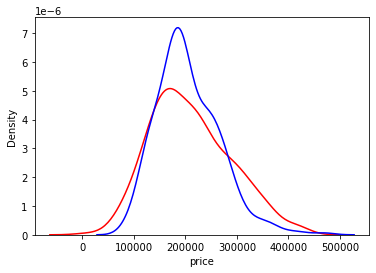

In [162]:
import seaborn as sns
ax0 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predicted_values, hist = False, color = 'b', label = "Predicted Value", ax = ax0)

In [163]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# model.fit(X_train,Y_train)
# print(model.score(X_test,Y_test))

In [164]:
from sklearn.model_selection import cross_val_score

In [165]:
cv = cross_val_score(model, X_Train, y_train, cv = 6)

In [166]:
cv

array([0.63820451, 0.68113317, 0.6089533 , 0.68772935, 0.6589799 ,
       0.56003989])

In [167]:
from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(LinearRegression(), k_features=15, forward=True, verbose=2, cv = 5)
features = feature_selector.fit(X_Train, y_train.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.5s finished

[2021-03-08 17:31:59] Features: 1/15 -- score: 0.5156936681688771[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.4s finished

[2021-03-08 17:32:00] Features: 2/15 -- score: 0.5969621617594256[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.4s finished

[2021-03-08 17:32:00] Features: 3/15 -- score: 0.6187268121545028[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [168]:
features.get_params()

{'clone_estimator': True,
 'cv': 5,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': False,
 'estimator': LinearRegression(),
 'fixed_features': None,
 'floating': False,
 'forward': True,
 'k_features': 15,
 'n_jobs': 1,
 'pre_dispatch': '2*n_jobs',
 'scoring': None,
 'verbose': 2,
 'linearregression': LinearRegression(),
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': False}

In [169]:
final_forward_selecgtion_features = features.subsets_

In [170]:
final_forward_selecgtion_features

{1: {'feature_idx': (3,),
  'cv_scores': array([0.51471758, 0.53593747, 0.49156619, 0.57936328, 0.45688383]),
  'avg_score': 0.5156936681688771,
  'feature_names': ('livingArea',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.59108616, 0.61888873, 0.58501863, 0.64251435, 0.54730293]),
  'avg_score': 0.5969621617594256,
  'feature_names': ('landValue', 'livingArea')},
 3: {'feature_idx': (2, 3, 7),
  'cv_scores': array([0.61354864, 0.63560181, 0.61357018, 0.65894782, 0.57196561]),
  'avg_score': 0.6187268121545028,
  'feature_names': ('landValue', 'livingArea', 'bathrooms')},
 4: {'feature_idx': (2, 3, 7, 26),
  'cv_scores': array([0.62255111, 0.64692043, 0.62459109, 0.67150252, 0.56600381]),
  'avg_score': 0.6263137944773445,
  'feature_names': ('landValue', 'livingArea', 'bathrooms', 'V17_Yes')},
 5: {'feature_idx': (2, 3, 7, 19, 26),
  'cv_scores': array([0.62292994, 0.65461497, 0.62500568, 0.68651096, 0.58004299]),
  'avg_score': 0.6338209100042576,
  'feature_names': ('land

In [171]:
from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(LinearRegression(), k_features=15, forward=False, verbose=2, cv = 5)
features = feature_selector.fit(X_Train, y_train.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.8s finished

[2021-03-08 17:32:06] Features: 26/15 -- score: 0.6367809910493737[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.6s finished

[2021-03-08 17:32:07] Features: 25/15 -- score: 0.6372396504327471[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s finished

[2021-03-08 17:32:08] Features: 24/15 -- score: 0.637596852749265[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [178]:
dic = features.subsets_

In [173]:
# from mlxtend.feature_selection import ExhaustiveFeatureSelector
# fature_selector_1 = ExhaustiveFeatureSelector(LinearRegression(), min_features=10, max_features=18, scoring='r2', print_progress = True, cv = 5)
# features = fature_selector_1.fit(X_Train, y_train)

In [182]:
dic[15]['feature_idx']

(0, 1, 2, 3, 7, 9, 15, 17, 18, 19, 21, 22, 23, 24, 26)

In [186]:
wrapper_features = independent_var.iloc[:, list(dic[15]['feature_idx'])]

In [196]:
from sklearn.preprocessing import PolynomialFeatures
# x_interactions = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(wrapper_features)
poly = PolynomialFeatures(2, interaction_only=True, include_bias=False)
poly.fit_transform(wrapper_features)


array([[-0.62453983,  0.47587071,  0.57364674, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67419268, -0.96875442, -0.33382192, ...,  0.        ,
         0.        ,  0.        ],
       [-0.46806603,  3.60589184, -0.82523094, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.15511844, -0.65919189, -0.39606706, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38982913,  0.68224573, -0.51400523, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15782915,  1.98928752, -0.21260769, ...,  0.        ,
         0.        ,  0.        ]])

In [198]:
wrapper_features

,lotSize,age,landValue,livingArea,bathrooms,heating_hot,sewer_none,sewer_public/commercial,sewer_septic,waterfront_Yes,waterfront_public/commercial,waterfront_septic,newConstruction_Yes,centralAir_Yes,V17_Yes
0,-0.624540,0.475871,0.573647,-1.408116,-1.366226,0,0,0,1,0,0,0,0,0,0
1,0.674193,-0.968754,-0.333822,0.403321,0.979479,1,0,0,0,0,0,1,0,0,0
2,-0.468066,3.605892,-0.825231,0.387750,-1.366226,1,0,0,0,0,1,0,0,0,0
3,-0.123824,-0.521609,-0.451760,0.387750,-0.584324,1,0,0,0,0,0,1,0,0,0
4,-0.593245,-0.968754,-0.572974,-1.522304,-1.366226,1,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,-0.170766,0.131912,-0.271577,1.020974,0.979479,1,0,0,0,0,1,0,0,0,0
1670,0.705487,0.303892,0.121550,1.460425,0.979479,1,0,0,0,0,1,0,0,0,0
1671,-0.155118,-0.659192,-0.396067,-1.074203,-1.366226,1,0,0,0,0,1,0,0,0,0
1672,-0.389829,0.682246,-0.514005,-0.856207,-1.366226,1,0,0,0,0,1,0,0,0,0


In [197]:
poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x0 x14',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x1 x14',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x2 x13',
 'x2 x14',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x3 x13',
 'x3 x14',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x4 x13',
 'x4 x14',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x5 x13',
 'x5 x14',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x6 x13',
 'x6 x14',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x7 x13',
 'x7 x14',
 'x8 x9',


In [189]:
pd.DataFrame(x_interactions)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,-0.624540,0.475871,0.573647,-1.408116,-1.366226,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.674193,-0.968754,-0.333822,0.403321,0.979479,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.468066,3.605892,-0.825231,0.387750,-1.366226,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.123824,-0.521609,-0.451760,0.387750,-0.584324,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.593245,-0.968754,-0.572974,-1.522304,-1.366226,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,-0.170766,0.131912,-0.271577,1.020974,0.979479,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1670,0.705487,0.303892,0.121550,1.460425,0.979479,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1671,-0.155118,-0.659192,-0.396067,-1.074203,-1.366226,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1672,-0.389829,0.682246,-0.514005,-0.856207,-1.366226,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
sm.OLS(target, pd.DataFrame(x_interactions)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     48.54
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:39:30   Log-Likelihood:                -20304.
No. Observations:                1674   AIC:                         4.075e+04
Df Residuals:                    1604   BIC:                         4.113e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0          -2908.5907   6835.614     -0.426      0.671   -1.63e+04    1.05e+04
1           1.381e+04   2.62e+04      0.526      0.599   -3.77e+04    6.53e+04
2           2.062e+04   7568.455      2.725      0.007    5777.435    3.55e+04
3           2.103e+04   9930.136      2.117      0.034    1549.226    4.05e+04
4          -1826.1965   9496.980     -0.192      0.848   -2.05e+04    1.68e+04
5           2.932e+05   6.97e+04      4.209      0.000    1.57e+05     4.3e+05
6           8.561e+04   2.24e+04      3.828      0.000    4.17e+04    1.29e+05
7           2.029e+05   9499.529     21.363      0.000    1.84e+05    2.22e+05
8           2.138e+05   8078.645     26.469      0.000    1.98e+05     2.3e+05
9           6.319e+04    1.6e+04      3.955      0.000    3.19e+04    9.45e+04
10         -4.642e+04   3.48e+04     -1.333      0.183   -1.15e+05    2.19e+04
11         -5.039e+04   3.49e+04     -1.445      0.149   -1.19e+05     1.8e+04
12         -7.997e+04   3.86e+04     -2.071      0.039   -1.56e+05   -4218.332
13          -810.1772   8517.953     -0.095      0.924   -1.75e+04    1.59e+04
14         -4900.6342   2.13e+04     -0.231      0.818   -4.66e+04    3.68e+04
15         -2048.4951   1647.291     -1.244      0.214   -5279.565    1182.575
16         -5223.9015   1484.397     -3.519      0.000   -8135.463   -2312.340
17          -176.9208   1605.417     -0.110      0.912   -3325.856    2972.015
18         -2526.2338   1744.942     -1.448      0.148   -5948.840     896.373
19         -1.696e+04   1.59e+04     -1.068      0.285   -4.81e+04    1.42e+04
20         -2.266e+04   5919.026     -3.828      0.000   -3.43e+04    -1.1e+04
21           3.63e+04   1.44e+04      2.514      0.012    7976.141    6.46e+04
22           402.3210   7195.491      0.056      0.955   -1.37e+04    1.45e+04
23          3732.8721   5624.620      0.664      0.507   -7299.505    1.48e+04
24          2.275e+04   2.01e+04      1.133      0.257   -1.66e+04    6.21e+04
25          2.738e+04   1.99e+04      1.375      0.169   -1.17e+04    6.65e+04
26         -9.211e+04   6.78e+04     -1.358      0.175   -2.25e+05    4.09e+04
27         -9214.3775   7803.934     -1.181      0.238   -2.45e+04    6092.602
28          4078.0707   4223.283      0.966      0.334   -4205.663    1.24e+04
29          2380.0983   1271.638      1.872      0.061    -114.148    4874.344
30         -2059.0661   1549.346     -1.329      0.184   -5098.022     979.890
31           610.8333   1674.712      0.365      0.715   -2674.020    3895.687
32          9.345e+04   8.11e+04      1.152      0.249   -6.56e+04    2.53e+05
33         -5.055e+04   1.32e+04     -3.828      0.000   -7.64e+04   -2.46e+04
34           162.9560   2.96e+04      0.005      0.996    -5.8e+04    5.83e+04
35         -2.927e+04   2.73e+04     -1.071      0.284   -8.29e+04    2.43e+04
36